In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, ward_tree, AgglomerativeClustering
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from matplotlib import pyplot as plt, colors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, make_scorer, rand_score, calinski_harabasz_score, silhouette_score, adjusted_rand_score
from sklearn.metrics.pairwise import manhattan_distances
from scipy.stats import uniform
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram
#%matplotlib notebook

***ЗАДАНИЕ 1***

Разбейте множество объектов из набора данных pluton в пакете «cluster» на 3 кластера методом центров тяжести (kmeans). Сравните качество разбиения в зависимости от максимального числа итераций алгоритма.

In [2]:
data = pd.read_csv('pluton.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Pu238,Pu239,Pu240,Pu241
0,0.126,75.804,21.204,2.180
1,0.133,75.515,21.408,2.240
2,0.127,75.175,21.668,2.305
3,0.156,78.872,18.428,1.906
4,0.503,73.317,20.223,4.128


In [3]:
data = pd.DataFrame(StandardScaler().fit_transform(data))

In [4]:
for max_iter in range(1, 1000, 1):
    kmeans = KMeans(n_clusters=3, max_iter=max_iter).fit(data)
    print(max_iter, silhouette_score(data, kmeans.labels_))

1 0.6987373638905686
2 0.6987373638905686
3 0.6987373638905686
4 0.6987373638905686
5 0.6987373638905686
6 0.6987373638905686
7 0.6987373638905686
8 0.6987373638905686
9 0.6987373638905686
10 0.6987373638905686
11 0.6987373638905686
12 0.6987373638905686
13 0.6987373638905686
14 0.6987373638905686
15 0.6987373638905686
16 0.6987373638905686
17 0.6987373638905686
18 0.6987373638905686
19 0.6987373638905686
20 0.6987373638905686
21 0.6987373638905686
22 0.6987373638905686
23 0.6987373638905686
24 0.6987373638905686
25 0.6987373638905686
26 0.6987373638905686
27 0.6987373638905686
28 0.6987373638905686
29 0.6987373638905686
30 0.6987373638905686
31 0.6987373638905686
32 0.6987373638905686
33 0.6987373638905686
34 0.6987373638905686
35 0.6987373638905686
36 0.6987373638905686
37 0.6987373638905686
38 0.6987373638905686
39 0.6987373638905686
40 0.6987373638905686
41 0.6987373638905686
42 0.6987373638905686
43 0.6987373638905686
44 0.6987373638905686
45 0.6987373638905686
46 0.69873736389056

364 0.6987373638905686
365 0.6987373638905686
366 0.6987373638905686
367 0.6987373638905686
368 0.6987373638905686
369 0.6987373638905686
370 0.6987373638905686
371 0.6987373638905686
372 0.6987373638905686
373 0.6987373638905686
374 0.6987373638905686
375 0.6987373638905686
376 0.6987373638905686
377 0.6987373638905686
378 0.6987373638905686
379 0.6987373638905686
380 0.6987373638905686
381 0.6987373638905686
382 0.6987373638905686
383 0.6987373638905686
384 0.6987373638905686
385 0.6987373638905686
386 0.6987373638905686
387 0.6987373638905686
388 0.6987373638905686
389 0.6987373638905686
390 0.6987373638905686
391 0.6987373638905686
392 0.6987373638905686
393 0.6987373638905686
394 0.6987373638905686
395 0.6987373638905686
396 0.6987373638905686
397 0.6987373638905686
398 0.6987373638905686
399 0.6987373638905686
400 0.6987373638905686
401 0.6987373638905686
402 0.6987373638905686
403 0.6987373638905686
404 0.6987373638905686
405 0.6987373638905686
406 0.6987373638905686
407 0.69873

721 0.6987373638905686
722 0.6987373638905686
723 0.6987373638905686
724 0.6987373638905686
725 0.6987373638905686
726 0.6987373638905686
727 0.6987373638905686
728 0.6987373638905686
729 0.6987373638905686
730 0.6987373638905686
731 0.6987373638905686
732 0.6987373638905686
733 0.6987373638905686
734 0.6987373638905686
735 0.6987373638905686
736 0.6987373638905686
737 0.6987373638905686
738 0.6987373638905686
739 0.6987373638905686
740 0.6987373638905686
741 0.6987373638905686
742 0.6987373638905686
743 0.6987373638905686
744 0.6987373638905686
745 0.6987373638905686
746 0.6987373638905686
747 0.6987373638905686
748 0.6987373638905686
749 0.6987373638905686
750 0.6987373638905686
751 0.6987373638905686
752 0.6987373638905686
753 0.6987373638905686
754 0.6987373638905686
755 0.6987373638905686
756 0.6987373638905686
757 0.6987373638905686
758 0.6987373638905686
759 0.6987373638905686
760 0.6987373638905686
761 0.6987373638905686
762 0.6987373638905686
763 0.6987373638905686
764 0.69873

In [6]:
kmeans = KMeans(n_clusters=3, max_iter=1, verbose=5, n_init=1).fit(data)
silhouette_score(data, kmeans.labels_)

Initialization complete
Iteration 0, inertia 39.84216667408056


0.6987373638905686

??????

***ЗАДАНИЕ 2***

Сгенерируйте набор данных в двумерном пространстве, состоящий из 3 кластеров, каждый из которых сильно “вытянут” вдоль одной из осей. Исследуйте качество кластеризации методом clara в зависимости от 1) использования стандартизации; 2) типа метрики. Объясните полученные результаты.

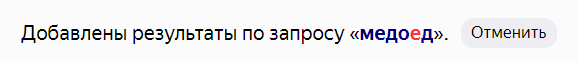

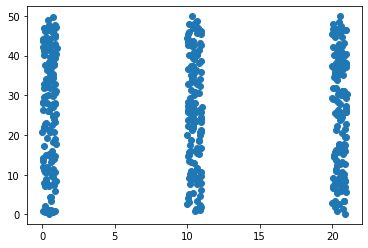

In [7]:
data = np.concatenate((uniform.rvs(loc=(0, 0), scale=(1, 50), size=(150, 2)), 
                       uniform.rvs(loc=(10, 0), scale=(1, 50), size=(150, 2)),
                       uniform.rvs(loc=(20, 0), scale=(1, 50), size=(150, 2))
                      ))
plt.scatter(data[:, 0], data[:, 1])

In [8]:
def plot_med(title: str, make_stand: bool, metric = 'euclidean'):
    if make_stand:
        tdata = StandardScaler().fit_transform(data)
    else:
        tdata = data
    
    kmedoids = KMedoids(n_clusters=3, metric=metric, method='pam').fit(tdata)
    labels = kmedoids.labels_

    unique_labels = set(labels)
    colors = [
        plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
    ]
    for k, col in zip(unique_labels, colors):

        class_member_mask = labels == k

        xy = tdata[class_member_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )
    plt.title(title)
    plt.show()

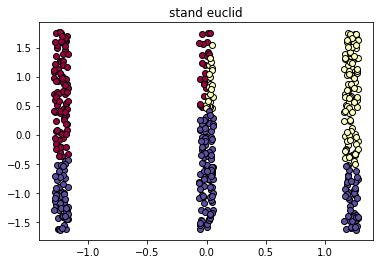

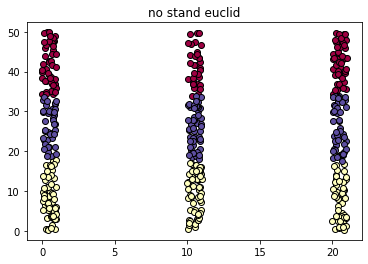

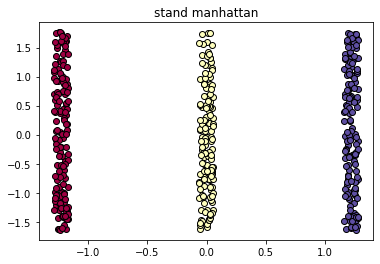

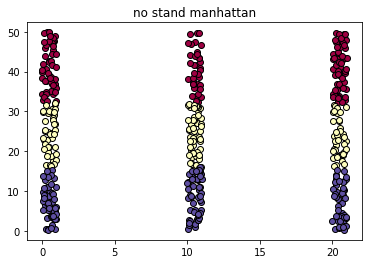

In [90]:
for title, stand, metric in (('stand euclid', True, 'euclidean'), ('no stand euclid', False, 'euclidean'),
                             ('stand manhattan', True, 'manhattan'), ('no stand manhattan', False, 'manhattan')
                            ):
    plot_med(title, stand, metric)

***ЗАДАНИЕ 3***

Постройте дендрограмму для набора данных votes.repub в пакете «cluster» (число голосов, поданных за республиканцев на выборах с 1856 по 1976 год). Строки представляют 50 штатов, а столбцы -  годы выборов (31). Проинтерпретируйте полученный результат.

In [10]:
data = pd.read_csv('votes.repub.csv')
data

,Unnamed: 0,X1856,X1860,X1864,X1868,X1872,X1876,X1880,X1884,X1888,...,X1940,X1944,X1948,X1952,X1956,X1960,X1964,X1968,X1972,X1976
0,Alabama,NaN,NaN,NaN,51.44,53.19,40.02,36.98,38.44,32.28,...,14.34,18.20,19.04,35.02,39.39,41.75,69.5,14.0,72.4,43.48
1,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,50.94,34.1,45.3,58.1,62.91
2,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.01,40.90,43.82,58.35,60.99,55.52,50.4,54.8,64.7,58.62
3,Arkansas,NaN,NaN,NaN,53.73,52.17,39.88,39.55,40.50,38.07,...,20.87,29.84,21.02,43.76,45.82,43.06,43.9,30.8,68.9,34.97
4,California,18.77,32.96,58.63,50.24,56.38,50.88,48.92,52.08,49.95,...,41.35,42.99,47.14,56.39,55.40,50.10,40.9,47.8,55.0,50.89
5,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,51.28,54.39,55.31,...,50.92,53.21,46.52,60.27,59.49,54.63,38.7,50.5,62.6,55.89
6,Connecticut,53.18,53.86,51.38,51.54,52.25,48.34,50.52,48.01,48.44,...,46.30,46.94,49.55,55.70,63.73,46.27,32.2,44.3,58.6,52.64
7,Delaware,2.11,23.71,48.20,40.98,50.99,44.55,47.86,42.75,43.55,...,45.05,45.27,50.04,51.75,55.09,49.00,39.1,45.1,59.6,47.27
8,Florida,NaN,NaN,NaN,NaN,53.52,50.99,45.83,46.82,39.94,...,25.99,29.68,33.63,55.01,57.20,51.51,48.9,40.5,71.9,46.83
9,Georgia,NaN,NaN,NaN,35.72,43.77,27.94,34.33,33.84,28.33,...,14.84,18.25,18.31,30.34,33.22,37.44,54.1,30.4,75.0,33.02


In [15]:
X = pd.DataFrame(StandardScaler(with_mean=False).fit_transform(data.drop('Unnamed: 0', axis=1).fillna(0)))
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
cl.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [16]:
def plot_dendrogram(model, **kwargs):
    # Создайте матрицу связей, а затем постройте дендрограмму

    # создаем количество выборок под каждым узлом
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # листовой узел
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Постройте соответствующую дендрограмму
    dendrogram(linkage_matrix, **kwargs)

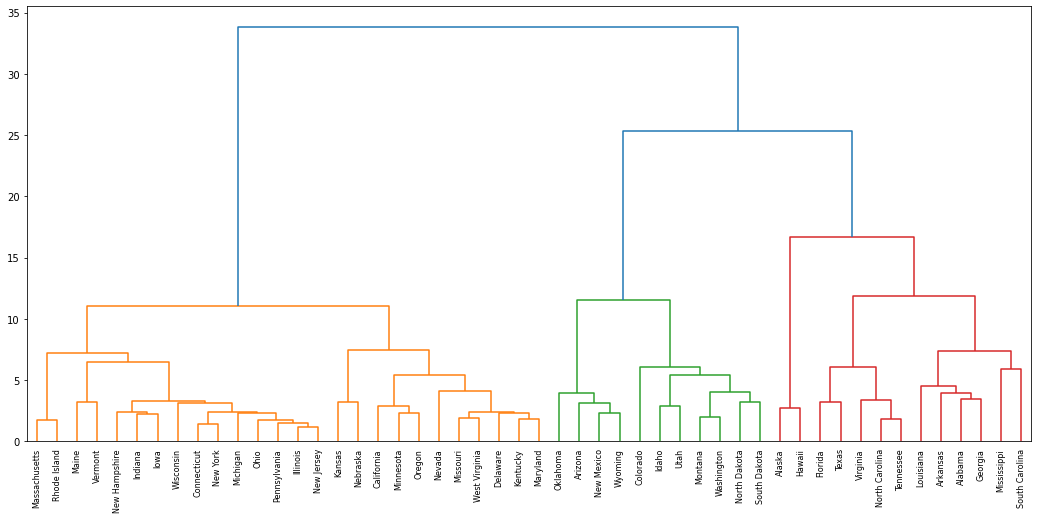

In [26]:
fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(8)
plot_dendrogram(cl, ax=ax, labels=data['Unnamed: 0'].to_numpy())

***ЗАДАНИЕ 4***

Постройте дендрограмму для набора данных animals в пакете «cluster». Данные содержат 6 двоичных признаков для 20 животных. Переменные - [ , 1] war теплокровные; [ , 2] fly летающие; [ , 3] ver позвоночные; [ , 4] end вымирающие; [ , 5] gro живущие в группе; [ , 6] hai имеющие волосяной покров. Проинтерпретируйте полученный результат.


In [28]:
data = pd.read_csv('animals.csv')
data

,Unnamed: 0,war,fly,ver,end,gro,hai
0,ant,1,1,1,1.0,2.0,1
1,bee,1,2,1,1.0,2.0,2
2,cat,2,1,2,1.0,1.0,2
3,cpl,1,1,1,1.0,1.0,2
4,chi,2,1,2,2.0,2.0,2
5,cow,2,1,2,1.0,2.0,2
6,duc,2,2,2,1.0,2.0,1
7,eag,2,2,2,2.0,1.0,1
8,ele,2,1,2,2.0,2.0,1
9,fly,1,2,1,1.0,1.0,1


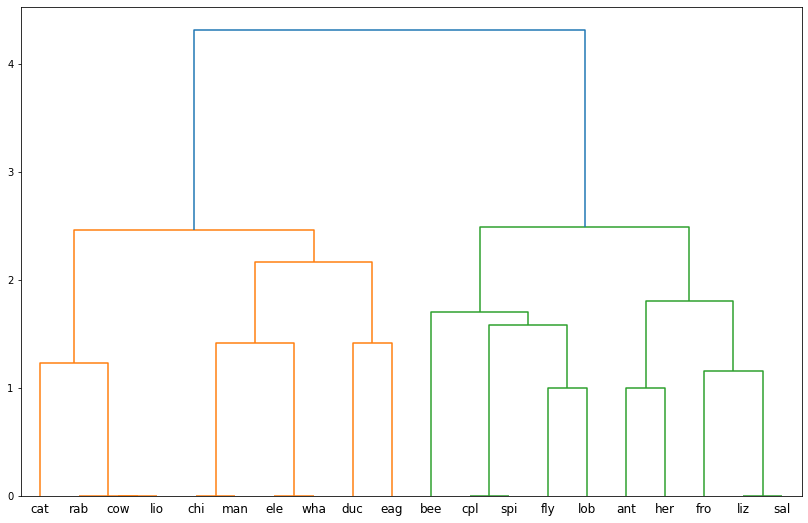

In [34]:
X = data.drop('Unnamed: 0', axis=1).fillna(1)
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
cl.fit(X)
fig, ax = plt.subplots()
fig.set_figwidth(14)
fig.set_figheight(9)
plot_dendrogram(cl, ax=ax, labels=data['Unnamed: 0'].to_numpy())

***ЗАДАНИЕ 5***

Рассмотрите данные из файла seeds_dataset.txt, который содержит описание зерен трех сортов пшеницы: Kama, Rosa and Canadian. Признаки: 1. область A, 2. периметр P, 3. компактность C = 4*pi*A/P^2, 4. длина зерна, 5. ширина зерна, 6. коэффициент ассиметрии, 7. длина колоска.

*чего от меня хотят-то? что значит "рассмотрите"?..*

In [35]:
data = pd.read_csv('seeds_dataset.txt', sep='\t', header=None)
data.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [39]:
X = pd.DataFrame(StandardScaler().fit_transform(data.drop(7, axis=1)))
models = {'agg': AgglomerativeClustering(n_clusters=3), 'kmeans': KMeans(n_clusters=3), 'kmedoid': KMedoids(n_clusters=3)}
for name, model in models.items():
    print(name, adjusted_rand_score(model.fit_predict(X), data[7]))

agg 0.796998283593012
kmeans 0.7732937360806309
kmedoid 0.7077693368128551
